# Imports

In [44]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import pickle as pkl

# Load data

In [2]:
df_train = pd.read_csv('data/ready/novelty_detection/train.csv')
print(df_train.shape)
df_train.head(3)

(8517, 30)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66


In [3]:
df_test = pd.read_csv('data/ready/novelty_detection/test.csv')
print(df_test.shape)
df_test.head(3)

(3222, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,11629.0,-3.891192,7.098916,-11.426467,8.607557,-2.065706,-2.985288,-8.138589,2.973928,-6.272790,...,1.757085,-0.189709,-0.508629,-1.189308,1.188536,0.605242,1.881529,0.875260,1.0,1
1,11635.0,0.919137,4.199633,-7.535607,7.426940,1.118215,-2.886722,-1.341036,0.363933,-2.203224,...,0.316094,0.055179,0.210692,-0.417918,-0.911188,0.466524,0.627393,0.157851,1.0,1
2,12093.0,-4.696795,2.693867,-4.475133,5.467685,-1.556758,-1.549420,-4.104215,0.553934,-1.498468,...,0.573898,-0.080163,0.318408,-0.245862,0.338238,0.032271,-1.508458,0.608075,0.0,1


# Prepare data

In [4]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,8517.0,4707.721733,3535.317169,0.000000,1640.000000,3755.000000,7595.000000,11490.000000
V1,8517.0,-0.260365,1.491390,-23.066842,-1.020737,-0.397761,1.141856,1.960497
V2,8517.0,0.274856,1.252096,-25.640527,-0.218264,0.307954,0.916919,8.261750
V3,8517.0,0.923700,1.026536,-12.389545,0.400882,0.943260,1.597809,4.101716
V4,8517.0,0.202446,1.405683,-4.657545,-0.664842,0.201740,1.105482,6.825816
V5,8517.0,-0.034014,1.146993,-32.092129,-0.638935,-0.126240,0.387220,11.974269
V6,8517.0,0.146579,1.301055,-7.574798,-0.645952,-0.163259,0.515315,21.393069
V7,8517.0,-0.033262,1.028321,-12.968670,-0.524052,-0.014469,0.508647,34.303177
V8,8517.0,-0.075259,1.303021,-23.632502,-0.198305,0.007048,0.284447,3.877662
V9,8517.0,0.714619,1.140818,-3.336805,-0.030144,0.683289,1.412100,10.392889


In [5]:
cols_x = list(set(df_train) - set(['Time']))

scaler = StandardScaler()

df_train[cols_x] = scaler.fit_transform(df_train[cols_x])

In [6]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,8517.0,4.707722e+03,3535.317169,0.000000,1640.000000,3755.000000,7595.000000,11490.000000
V1,8517.0,3.502606e-17,1.000059,-15.292992,-0.509871,-0.092132,0.940266,1.489209
V2,8517.0,-3.234077e-17,1.000059,-20.698814,-0.393859,0.026436,0.512821,6.379193
V3,8517.0,-2.953816e-17,1.000059,-12.969858,-0.509333,0.019055,0.656721,3.096045
V4,8517.0,2.190725e-16,1.000059,-3.457590,-0.617023,-0.000502,0.642455,4.712128
V5,8517.0,-7.169457e-18,1.000059,-27.951335,-0.527428,-0.080412,0.367272,10.469971
V6,8517.0,1.553849e-16,1.000059,-5.935052,-0.609181,-0.238158,0.283430,16.331158
V7,8517.0,-4.939886e-16,1.000059,-12.579892,-0.477301,0.018277,0.527016,33.392740
V8,8517.0,-7.919317e-17,1.000059,-18.080004,-0.094437,0.063170,0.276071,3.033836
V9,8517.0,1.088715e-16,1.000059,-3.551541,-0.652871,-0.027464,0.611423,8.484121


In [8]:
display(df_test.describe())
df_test[cols_x] = scaler.transform(df_test[cols_x])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,...,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000
mean,96880.688703,-0.728808,0.501427,-1.042488,0.660247,-0.490839,-0.156658,-0.828261,0.041005,-0.416343,...,0.117543,0.011895,0.002610,-0.006387,0.012046,0.001889,0.031656,0.014020,98.864081,0.144010
std,45508.827651,3.647393,2.604545,3.966699,2.345412,2.696037,1.552964,3.634523,2.930782,1.659887,...,1.742161,0.900996,0.911718,0.602374,0.578221,0.479543,0.648716,0.440398,290.535683,0.351154
min,11609.000000,-30.552380,-22.689184,-31.103685,-4.585854,-23.611865,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.732373,-4.781606,-1.291623,-7.263482,-8.233983,0.000000,0.000000
25%,56820.000000,-1.267582,-0.518898,-1.457848,-0.719593,-0.882078,-0.886323,-0.804280,-0.203185,-0.980280,...,-0.217665,-0.532658,-0.182557,-0.367761,-0.320350,-0.319777,-0.068036,-0.052916,4.490000,0.000000
50%,89473.000000,-0.257336,0.205603,-0.124914,0.199544,-0.145395,-0.333354,-0.088740,0.052021,-0.188214,...,0.011067,0.033736,-0.009734,0.037817,0.041480,-0.053643,0.011940,0.016342,21.225000,0.000000
75%,139251.750000,1.240967,1.068853,0.856015,1.266733,0.598361,0.324527,0.496686,0.433308,0.479818,...,0.271650,0.579088,0.164315,0.435732,0.381255,0.246354,0.156597,0.105088,85.837500,0.000000
max,172782.000000,2.401777,22.057729,3.544676,12.114672,11.095089,16.493227,28.069822,20.007208,6.498604,...,27.202839,8.361985,17.768462,3.143346,3.975111,2.745261,6.211230,15.374949,7766.600000,1.000000


In [9]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,3222.0,96880.688703,45508.827651,11609.000000,56820.000000,89473.000000,139251.750000,172782.000000
V1,3222.0,-0.314116,2.445777,-20.312455,-0.675394,0.002031,1.006725,1.785112
V2,3222.0,0.180964,2.080270,-18.341554,-0.633977,-0.055313,0.634172,17.398147
V3,3222.0,-1.915475,3.864386,-31.201305,-2.320121,-1.021568,-0.065939,2.553373
V4,3222.0,0.325697,1.668619,-3.406586,-0.655975,-0.002065,0.757176,8.474829
V5,3222.0,-0.398304,2.350663,-20.557429,-0.739423,-0.097112,0.551366,9.703418
V6,3222.0,-0.233084,1.193689,-5.036858,-0.793942,-0.368901,0.136780,12.564885
V7,3222.0,-0.773149,3.534632,-42.327770,-0.749827,-0.053953,0.515383,27.330702
V8,3222.0,0.089231,2.249352,-31.443395,-0.098183,0.097687,0.390321,15.413139
V9,3222.0,-0.991418,1.455083,-12.402956,-1.485775,-0.791437,-0.205830,5.070330


# Apply Local Outlier Factor

In [24]:
clf = LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.05)

In [25]:
clf.fit(df_train[cols_x])

LocalOutlierFactor(contamination=0.05, novelty=True)

In [26]:
y_test_pred = clf.predict(df_test[cols_x])
y_test_pred[:5]

/Users/egorabrosimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


array([-1, -1, -1, -1, -1])

In [27]:
df_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,11629.0,-2.434668,5.450429,-12.031620,5.979729,-1.771424,-2.407316,-7.882561,2.340228,-6.125271,...,1.934016,-0.050864,-0.989563,-2.028175,2.602024,0.999667,4.716578,3.227163,-0.329268,1
1,11635.0,0.790920,3.134749,-8.241117,5.139791,1.004624,-2.331553,-1.271831,0.337077,-2.557827,...,0.395677,0.328489,0.517868,-0.739919,-2.363166,0.744183,1.557017,0.578265,-0.329268,1
2,12093.0,-2.974869,1.932083,-5.259581,3.745899,-1.327674,-1.303633,-3.959067,0.482901,-1.940026,...,0.670898,0.118832,0.743600,-0.452578,0.591336,-0.055604,-3.823861,2.240630,-0.334506,1
3,12095.0,-2.995601,2.212111,-6.353832,4.073522,-1.880466,-1.288185,-4.331742,0.761084,-1.772192,...,0.753196,0.638002,1.394158,-0.439662,-1.795982,-0.176903,-3.378747,2.601084,-0.175331,1
4,12393.0,-2.550549,2.257211,-2.057719,2.178561,-1.630051,0.133570,-0.896346,-2.457722,1.846336,...,1.860974,0.120874,0.482324,0.758802,-1.406449,-0.869904,-7.672901,-2.332961,0.606507,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,44333.0,-1.296469,-0.117548,0.834218,3.007061,0.701447,0.152723,1.153480,-0.773994,-0.961407,...,-0.472325,0.218633,1.441962,0.613116,-2.318394,-0.569038,-3.975698,1.507394,-0.135315,0
3218,131701.0,1.642462,-1.153226,-2.415687,-1.743277,-0.697180,-0.943320,-0.498002,-0.112009,-0.049922,...,0.024232,1.193258,-0.044715,-0.558114,0.376137,0.064275,-0.016721,-0.278331,-0.255049,0
3219,48960.0,0.267404,0.436600,0.523447,0.967781,0.177144,0.121850,0.800871,-0.308623,-0.422624,...,-0.039725,0.792990,0.342892,0.107610,-3.554915,-1.163425,-0.632103,-0.723385,-0.220742,0
3220,109947.0,-0.292988,0.308864,-0.560587,-1.831866,0.604132,-1.155450,1.191052,-0.280012,0.852480,...,-0.055339,0.296731,-0.952692,0.078580,2.653692,-0.277447,-1.000815,-0.398322,-0.282914,0


In [28]:
y_test_pred = pd.Series(y_test_pred)

In [29]:
y_test_pred.replace(to_replace={1: 0
                               , -1: 1}, inplace=True)

y_test_pred.value_counts()

0    2252
1     970
dtype: int64

In [32]:
acc = accuracy_score(y_test_pred, df_test['Class'])
rec = recall_score(y_test_pred, df_test['Class'])

cm = confusion_matrix(y_test_pred, df_test['Class'])

TEST accuracy = 0.8063314711359404
TEST recall = 0.4175257731958763


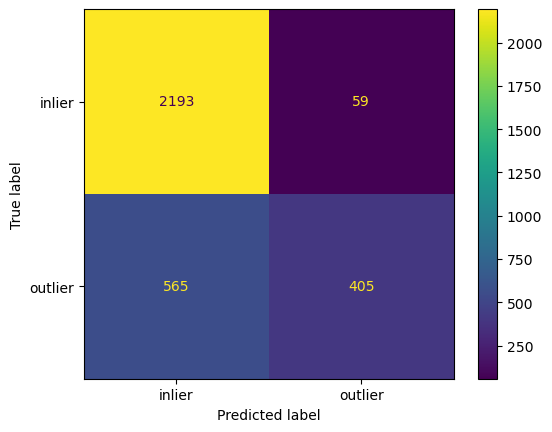

In [40]:
print(f'TEST accuracy = {acc}')
print(f'TEST recall = {rec}')

cm_plot = ConfusionMatrixDisplay(cm, display_labels=['inlier', 'outlier'])

cm_plot.plot()

# Save predictions and models

In [42]:
df_test['prediction'] = y_test_pred

In [43]:
df_test.to_csv('data/results/novelty_detection/lof_predict.csv', index=False)

In [45]:
with open('data/models/novelty_detection/scaler.pkl', 'wb') as handle:
    pkl.dump(scaler, handle,)